## <span style="color:red"> Recursive Feature Elimination with Cross-Validation (RFECV)
</span>


    - Recursive Feature Elimination fits a model that starts with all the input variables, then iteratively removes those with the weakest relationship with the output until the desired number of features is reached. It actually fits a model instead of just running statistical tests unlike the Univariate Testing.

“RFE is popular because it is easy to configure and use and because it is effective at selecting those features in a training dataset that are more or most relevant in predicting the target variable.”

The CV in RFECV means Cross-Validation. It gives you a better understanding on what the variables will be included in your model.

In the Cross-Validation part, it splits the data into different chunks and iteratively trains and validates models on each chunks separately. This simply means that each time you assess different models with certain variables included or eliminated, the algorithm also knows how accurate each model was from the model scenarios that are created and can determine which provided the best accuracy and concludes the best set of input variables to use.

### <span style="color:red"> Feature Selection- Python code for Decision Tree</span>


### <span style="color:red"> OS Module</span>

The os module in Python provides a way to interact with the operating system. It includes various functions that allow you to perform operations related to the file system, process management, and environment variables. Some common tasks that you can perform using the os module include:

In [2]:
import os

# Get current working directory
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# List files in the current directory
files = os.listdir(current_dir)
print("Files in Current Directory:", files)

Current Directory: c:\Users\yitay\OneDrive\Documents\CIND119_introduction_to_big_data\Group_project\FinalProject
Files in Current Directory: ['Decision_Tree.ipynb', 'features_selection_rfect.ipynb', 'feature_selection_correlation.ipynb', 'feature_selection_univariate_testing.ipynb', 'Final Project_Creditworthy Germans.docx', 'german_credit.arff', 'german_credit.csv', 'Project Milestone Template.docx', 'ProjectSubmisionTemplate.pptx', 'project_datasets.zip', 'python_sklearn_tutotrial.ipynb', 'python_weka.ipynb']


In [ ]:
#  install the scikit-learn library using a package manager like pip.
#  Open your terminal or command prompt and run the following command:
pip install scikit-learn

### Decreasing Order

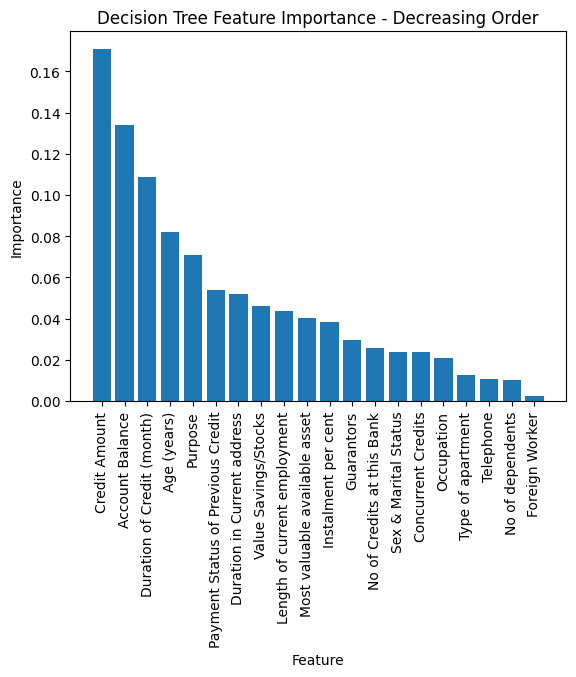

In [1]:
# import packages
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Import data
my_df = pd.read_csv("german_credit.csv")

X = my_df.drop(["Creditability"], axis=1)
y = my_df["Creditability"]

# Use Decision Tree Classifier for feature selection
classifier = DecisionTreeClassifier(random_state=42)
feature_importances = classifier.fit(X, y).feature_importances_

# Sort features based on their importance in decreasing order
sorted_indices = sorted(range(X.shape[1]), key=lambda k: feature_importances[k], reverse=True)

# Plot Decision Tree Feature Importance vertically in decreasing order
plt.bar(range(X.shape[1]), [feature_importances[i] for i in sorted_indices])
plt.xticks(range(X.shape[1]), [X.columns[i] for i in sorted_indices], rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Decision Tree Feature Importance - Decreasing Order')
plt.show()


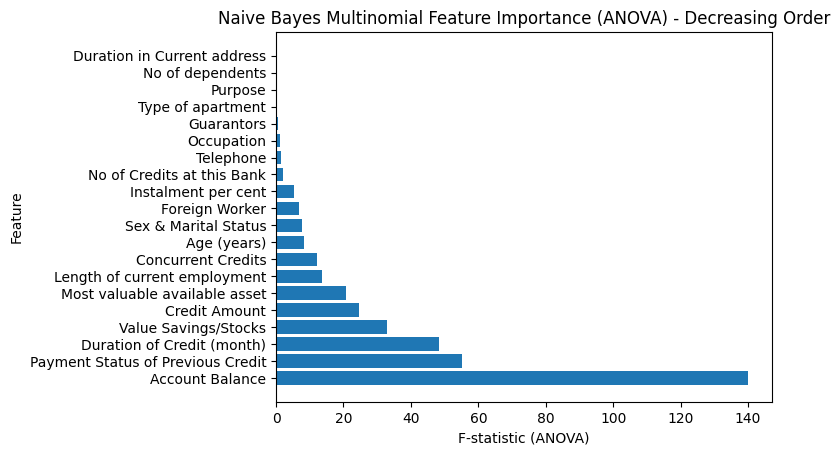

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Import data
my_df = pd.read_csv("german_credit.csv")
X = my_df.drop(["Creditability"], axis=1)
y = my_df["Creditability"]

# Use Multinomial Naive Bayes for feature selection
nb_classifier = MultinomialNB()
feature_selector = SelectKBest(f_classif, k='all')
X_new = feature_selector.fit_transform(X, y)
selected_features = feature_selector.get_support(indices=True)

# Sort features based on their importance (F-statistic in this case)
sorted_indices = sorted(range(len(selected_features)), key=lambda k: feature_selector.scores_[selected_features][k], reverse=True)

# Plot Naive Bayes Multinomial Feature Importance (ANOVA) in decreasing order
plt.barh(range(len(selected_features)), feature_selector.scores_[selected_features][sorted_indices])
plt.yticks(range(len(selected_features)), X.columns[selected_features][sorted_indices])
plt.xlabel('F-statistic (ANOVA)')
plt.ylabel('Feature')
plt.title('Naive Bayes Multinomial Feature Importance (ANOVA) - Decreasing Order')
plt.show()


### Increasing Order

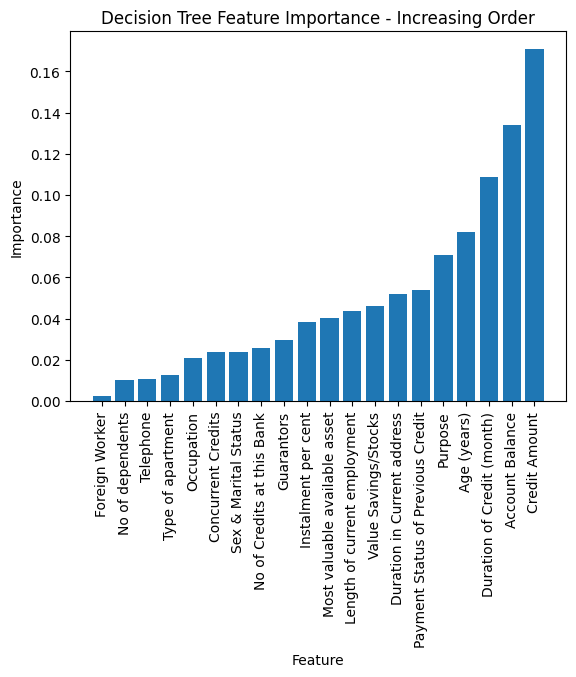

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Import data
my_df = pd.read_csv("german_credit.csv")

X = my_df.drop(["Creditability"], axis=1)
y = my_df["Creditability"]

# Use Decision Tree Classifier for feature selection
classifier = DecisionTreeClassifier(random_state=42)
feature_importances = classifier.fit(X, y).feature_importances_

# Sort features based on their importance in increasing order
sorted_indices = sorted(range(X.shape[1]), key=lambda k: feature_importances[k])

# Plot Decision Tree Feature Importance vertically in increasing order
plt.bar(range(X.shape[1]), [feature_importances[i] for i in sorted_indices])
plt.xticks(range(X.shape[1]), [X.columns[i] for i in sorted_indices], rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Decision Tree Feature Importance - Increasing Order')
plt.show()


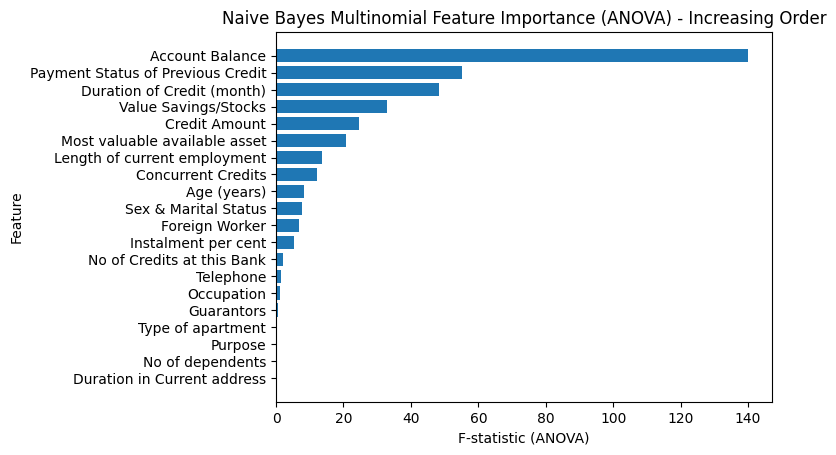

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Import data
my_df = pd.read_csv("german_credit.csv")
X = my_df.drop(["Creditability"], axis=1)
y = my_df["Creditability"]

# Use Multinomial Naive Bayes for feature selection
nb_classifier = MultinomialNB()
feature_selector = SelectKBest(f_classif, k='all')
X_new = feature_selector.fit_transform(X, y)
selected_features = feature_selector.get_support(indices=True)

# Sort features based on their importance (F-statistic in this case)
sorted_indices = sorted(range(len(selected_features)), key=lambda k: feature_selector.scores_[selected_features][k])

# Plot Naive Bayes Multinomial Feature Importance (ANOVA) in increasing order
plt.barh(range(len(selected_features)), feature_selector.scores_[selected_features][sorted_indices])
plt.yticks(range(len(selected_features)), X.columns[selected_features][sorted_indices])
plt.xlabel('F-statistic (ANOVA)')
plt.ylabel('Feature')
plt.title('Naive Bayes Multinomial Feature Importance (ANOVA) - Increasing Order')
plt.show()

# If you want to plot in decreasing order, reverse the sorted indices
# sorted_indices = sorted_indices[::-1]
# plt.barh(range(len(selected_features)), feature_selector.scores_[selected_features][sorted_indices])
# plt.yticks(range(len(selected_features)), X.columns[selected_features][sorted_indices])
# plt.xlabel('F-statistic (ANOVA)')
# plt.ylabel('Feature')
# plt.title('Naive Bayes Multinomial Feature Importance (ANOVA) - Decreasing Order')
# plt.show()


## keep the variables order-No order

In [4]:
# Import packages
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [5]:
# Import data
my_df = pd.read_csv("german_credit.csv")
X = my_df.drop(["Creditability"], axis=1)
y = my_df["Creditability"]

In [13]:
# Use Decision Tree Classifier for feature selection
classifier = DecisionTreeClassifier(random_state=42)
feature_selector = SelectFromModel(classifier)

In [14]:
# Fit the classifier before using it for feature selection
classifier.fit(X, y)
fit = feature_selector.fit(X, y)
X_new = feature_selector.transform(X)

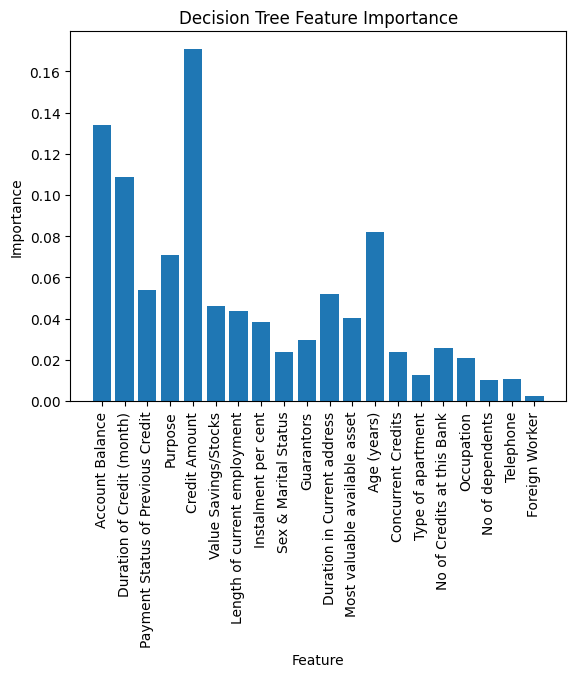

In [15]:
# Plot feature importances vertically
feature_importances = classifier.feature_importances_
plt.bar(range(X.shape[1]), feature_importances)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


In [ ]:
# To plot the feature importances horizontally, you can use the barh function instead of bar.
# Additionally, you will need to adjust the yticks and ylabel accordingly. Here's the modified code:
# barh is used instead of bar to create a horizontal bar plot.
# yticks are adjusted to match the feature names with the corresponding bars.
# xlabel and ylabel are swapped to reflect the changes in orientation.

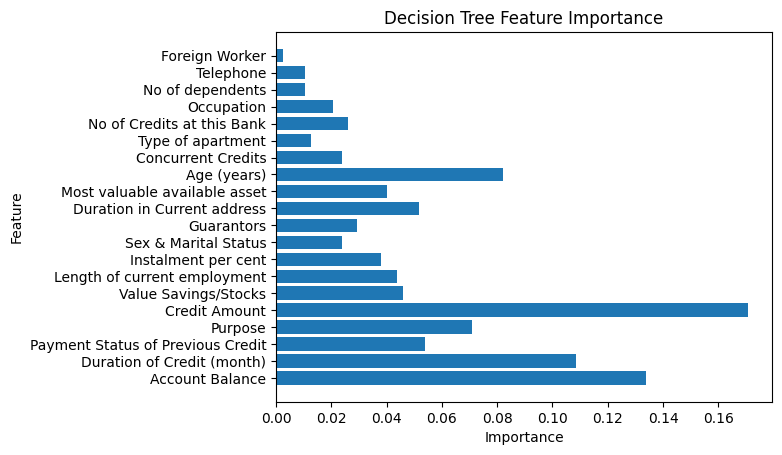

In [3]:
# Plot feature importances horizontally
feature_importances = classifier.feature_importances_
plt.barh(range(X.shape[1]), feature_importances)  # Use barh for horizontal bar plot
plt.yticks(range(X.shape[1]), X.columns)  # Adjust yticks and ylabel
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()


### Feature Selection- Python code for Naïve Bayes-MultinomialNB  

### Vertically

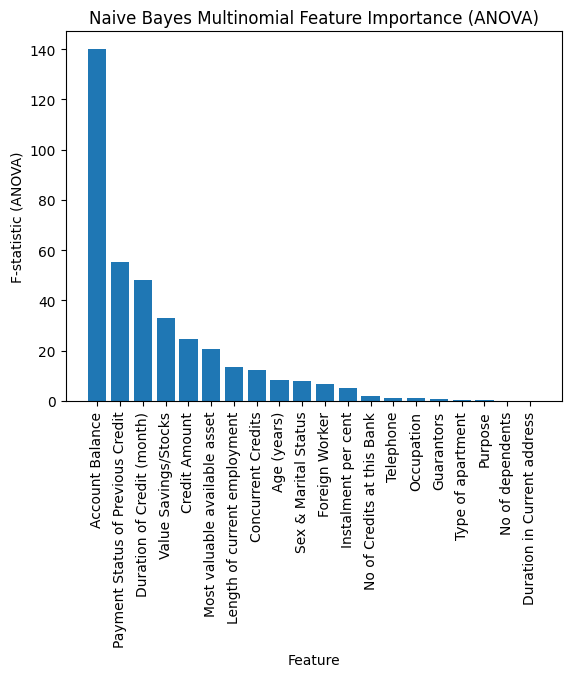

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Import data
my_df = pd.read_csv("german_credit.csv")
X = my_df.drop(["Creditability"], axis=1)
y = my_df["Creditability"]

# Use Multinomial Naive Bayes for feature selection
nb_classifier = MultinomialNB()
feature_selector = SelectKBest(f_classif, k='all')
X_new = feature_selector.fit_transform(X, y)
selected_features = feature_selector.get_support(indices=True)

# Sort features based on their importance (F-statistic in this case)
sorted_indices = sorted(range(len(selected_features)), key=lambda k: feature_selector.scores_[selected_features][k], reverse=True)

# Plot Naive Bayes Multinomial Feature Importance (ANOVA) vertically
plt.bar(range(len(selected_features)), feature_selector.scores_[selected_features][sorted_indices])
plt.xticks(range(len(selected_features)), X.columns[selected_features][sorted_indices], rotation=90)
plt.ylabel('F-statistic (ANOVA)')
plt.xlabel('Feature')
plt.title('Naive Bayes Multinomial Feature Importance (ANOVA)')
plt.show()


### Horizontally- Decreasing Order

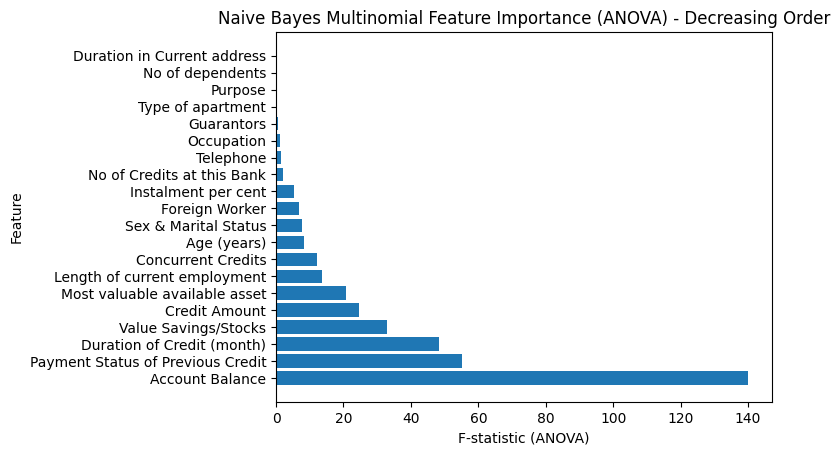

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Import data
my_df = pd.read_csv("german_credit.csv")
X = my_df.drop(["Creditability"], axis=1)
y = my_df["Creditability"]

# Use Multinomial Naive Bayes for feature selection
nb_classifier = MultinomialNB()
feature_selector = SelectKBest(f_classif, k='all')
X_new = feature_selector.fit_transform(X, y)
selected_features = feature_selector.get_support(indices=True)

# Sort features based on their importance (F-statistic in this case)
sorted_indices = sorted(range(len(selected_features)), key=lambda k: feature_selector.scores_[selected_features][k], reverse=True)

# Plot Naive Bayes Multinomial Feature Importance (ANOVA) horizontally in decreasing order
plt.barh(range(len(selected_features)), feature_selector.scores_[selected_features][sorted_indices])
plt.yticks(range(len(selected_features)), X.columns[selected_features][sorted_indices])
plt.xlabel('F-statistic (ANOVA)')
plt.ylabel('Feature')
plt.title('Naive Bayes Multinomial Feature Importance (ANOVA) - Decreasing Order')
plt.show()


### Decision Tree and Naive Bayes- side by side Horizontally

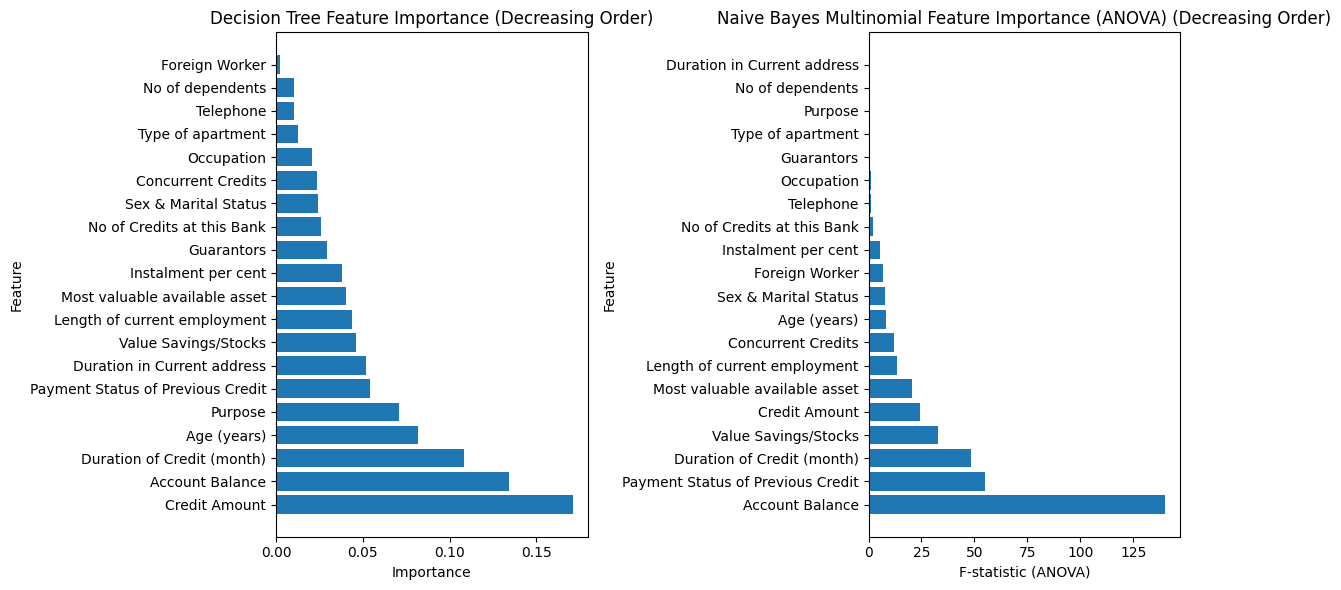

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Import data
my_df = pd.read_csv("german_credit.csv")
X = my_df.drop(["Creditability"], axis=1)
y = my_df["Creditability"]

# Use Decision Tree Classifier for feature selection
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_feature_importances = dt_classifier.fit(X, y).feature_importances_

# Use Multinomial Naive Bayes for feature selection
nb_classifier = MultinomialNB()
feature_selector = SelectKBest(f_classif, k='all')
X_new = feature_selector.fit_transform(X, y)
selected_features = feature_selector.get_support(indices=True)

# Sort features based on their importance for Decision Tree
sorted_dt_indices = sorted(range(X.shape[1]), key=lambda k: dt_feature_importances[k], reverse=True)

# Sort features based on their importance for Naive Bayes
sorted_nb_indices = sorted(range(len(selected_features)), key=lambda k: feature_selector.scores_[selected_features][k], reverse=True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Decision Tree Feature Importance (in decreasing order)
axes[0].barh(range(X.shape[1]), [dt_feature_importances[i] for i in sorted_dt_indices])
axes[0].set_yticks(range(X.shape[1]))
axes[0].set_yticklabels(X.columns[sorted_dt_indices])
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Feature')
axes[0].set_title('Decision Tree Feature Importance (Decreasing Order)')

# Plot Naive Bayes Multinomial Feature Importance (ANOVA) (in decreasing order)
axes[1].barh(range(len(selected_features)), [feature_selector.scores_[selected_features][i] for i in sorted_nb_indices])
axes[1].set_yticks(range(len(selected_features)))
axes[1].set_yticklabels(X.columns[selected_features][sorted_nb_indices])
axes[1].set_xlabel('F-statistic (ANOVA)')
axes[1].set_ylabel('Feature')
axes[1].set_title('Naive Bayes Multinomial Feature Importance (ANOVA) (Decreasing Order)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


###  Decision Tree and Naive Bayes- Top Bottom

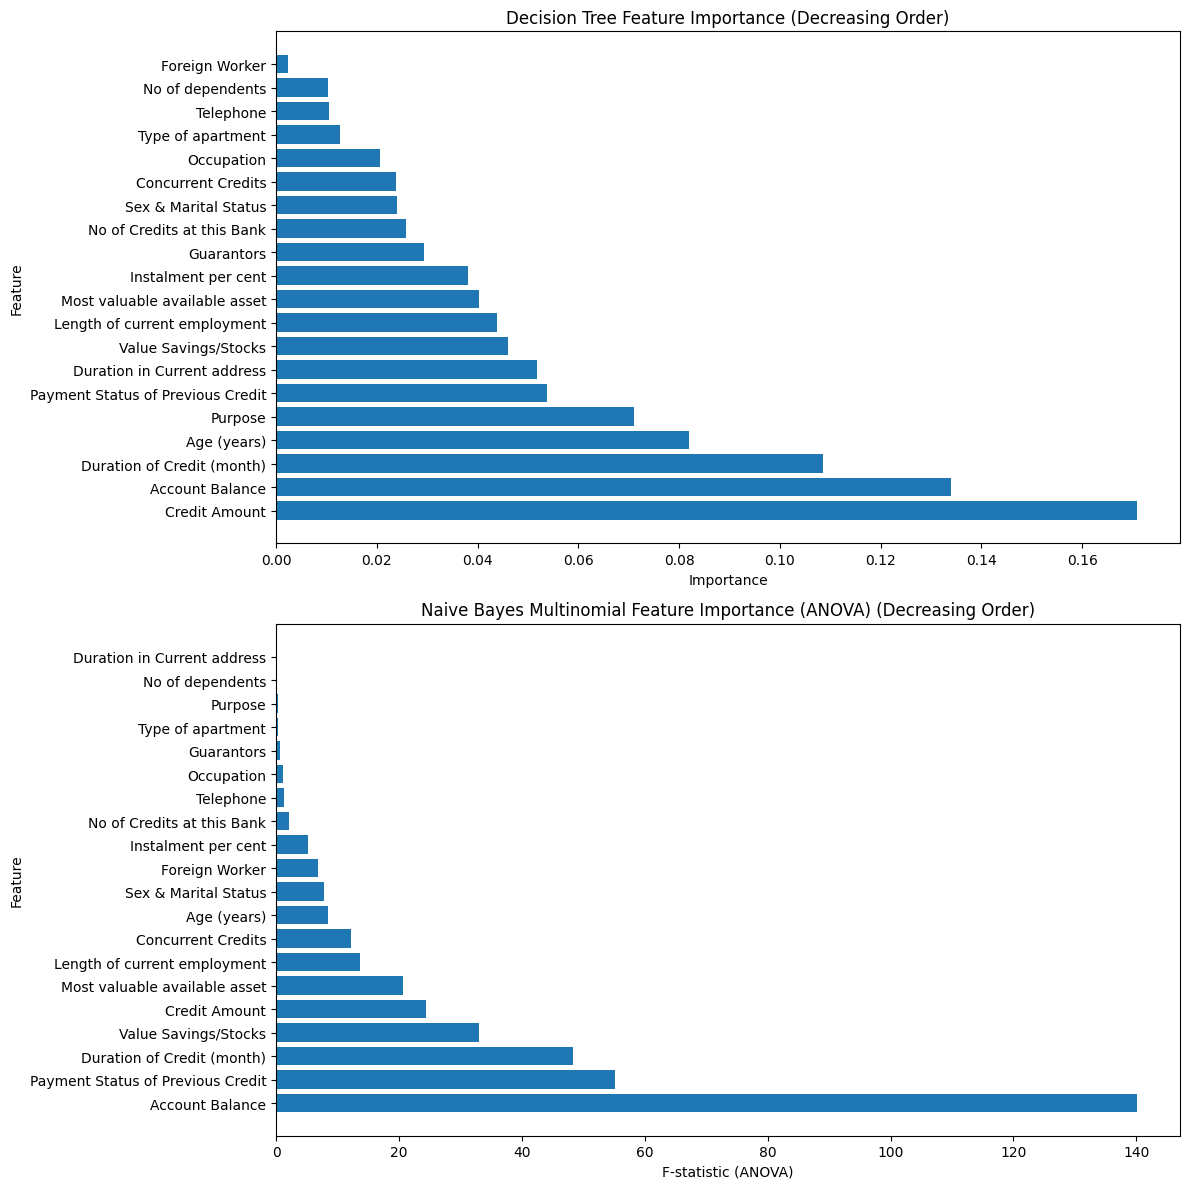

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Import data
my_df = pd.read_csv("german_credit.csv")
X = my_df.drop(["Creditability"], axis=1)
y = my_df["Creditability"]

# Use Decision Tree Classifier for feature selection
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_feature_importances = dt_classifier.fit(X, y).feature_importances_

# Use Multinomial Naive Bayes for feature selection
nb_classifier = MultinomialNB()
feature_selector = SelectKBest(f_classif, k='all')
X_new = feature_selector.fit_transform(X, y)
selected_features = feature_selector.get_support(indices=True)

# Sort features based on their importance for Decision Tree
sorted_dt_indices = sorted(range(X.shape[1]), key=lambda k: dt_feature_importances[k], reverse=True)

# Sort features based on their importance for Naive Bayes
sorted_nb_indices = sorted(range(len(selected_features)), key=lambda k: feature_selector.scores_[selected_features][k], reverse=True)

# Create a single subplot
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plot Decision Tree Feature Importance (in decreasing order)
ax[0].barh(range(X.shape[1]), [dt_feature_importances[i] for i in sorted_dt_indices])
ax[0].set_yticks(range(X.shape[1]))
ax[0].set_yticklabels(X.columns[sorted_dt_indices])
ax[0].set_xlabel('Importance')
ax[0].set_ylabel('Feature')
ax[0].set_title('Decision Tree Feature Importance (Decreasing Order)')

# Plot Naive Bayes Multinomial Feature Importance (ANOVA) (in decreasing order)
ax[1].barh(range(len(selected_features)), [feature_selector.scores_[selected_features][i] for i in sorted_nb_indices])
ax[1].set_yticks(range(len(selected_features)))
ax[1].set_yticklabels(X.columns[selected_features][sorted_nb_indices])
ax[1].set_xlabel('F-statistic (ANOVA)')
ax[1].set_ylabel('Feature')
ax[1].set_title('Naive Bayes Multinomial Feature Importance (ANOVA) (Decreasing Order)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
